<a href="https://colab.research.google.com/github/egioia92/Machine-Learning/blob/main/Assignment_Binary_Logistic_Regression_using_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment_Binary Logistic Regression using R

The Data for a Study of Risk Factors Associated with Low Infant Birth Weight. Data were collected at Baystate Medical Center, Springfield, Massachusetts.

Description of variables -

LOW – Low Birth Weight (0 means Not low and 1 means low)

AGE- Age of the Mother in Years

LWT- Weight in Pounds at the Last Menstrual Period

RACE- Race (1 = White, 2 = Black, 3 = Other)

SMOKE- Smoking Status During Pregnancy (1 = Yes, 0 = No)

PTL- History of Premature Labor (0 = None, 1 = One, etc.)

HT- History of Hypertension (1 = Yes, 0 = No)

UI- Presence of Uterine Irritability (1 = Yes, 0 = No)

FTV- Number of Physician Visits During the First Trimester (0 = None, 1 = One, 2 = Two, etc.)



Consider LOW as dependent variable and remaining variables listed above as independent variables.

Consideration on the data:

1. LOW is the dependend variable
2. There are some independent variables that are categorical
  *   RACE
  *   SMOKE
  *   PTL
  *   HT
  *   UI
  *   FTV





# Question 1: Import BIRTH WEIGHT data

In [ ]:
install.packages("ROCR");
install.packages("car");
install.packages("caret");
library(ggplot2)
library(dplyr)
library(ROCR)
library(car)
library(caret)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘prodlim’, ‘ipred’, ‘foreach’, ‘recipes’


Loading required package: lattice



In [ ]:
#Read data
data <- read.csv('/content/BIRTH WEIGHT_csv.csv')

In [ ]:
# Show the data
head(data)

,SR.NO,ID,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,1,85,0,19,182,2,0,0,0,0,0
2,2,86,0,33,155,3,0,0,0,0,3
3,3,87,0,20,105,1,1,0,0,0,1
4,4,88,0,21,108,1,1,0,0,1,2
5,5,89,0,18,107,1,1,0,0,1,0
6,6,91,0,21,124,3,0,0,0,0,0


In [ ]:
# Remove SR.NO and ID columns from the data
data <- data[,-c(1,2)]

# Alternatively
# data <- data %>% select(-SR.NO, -ID)

# Alternatively
# data$SR_NO <- NULL
# data$ID <- NULL

head(data)

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,19,182,2,0,0,0,0,0
2,0,33,155,3,0,0,0,0,3
3,0,20,105,1,1,0,0,0,1
4,0,21,108,1,1,0,0,1,2
5,0,18,107,1,1,0,0,1,0
6,0,21,124,3,0,0,0,0,0


In [ ]:
# Structure of the data
str(data)

'data.frame':	189 obs. of  9 variables:
 $ LOW  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ AGE  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ LWT  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ RACE : int  2 3 1 1 1 3 1 3 1 1 ...
 $ SMOKE: int  0 0 1 1 1 0 0 0 1 1 ...
 $ PTL  : int  0 0 0 0 0 0 0 0 0 0 ...
 $ HT   : int  0 0 0 0 0 0 0 0 0 0 ...
 $ UI   : int  0 0 0 1 1 0 0 0 0 0 ...
 $ FTV  : int  0 3 1 2 0 0 1 1 1 0 ...


In [ ]:
# Convert categorical variables as factor
data$LOW <- as.factor(data$LOW)
data$RACE <- as.factor(data$RACE)
data$SMOKE <- as.factor(data$SMOKE)
data$PTL <- as.factor(data$PTL)
data$HT <- as.factor(data$HT)
data$UI <- as.factor(data$UI)
data$FTV <- as.factor(data$FTV)

# Alternatively
#data <- data %>% mutate(across(c(LOW, RACE, SMOKE, PTL, HT, UI, FTV), as.factor))

In [ ]:
# Structure of the data
str(data)

'data.frame':	189 obs. of  9 variables:
 $ LOW  : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ AGE  : int  19 33 20 21 18 21 22 17 29 26 ...
 $ LWT  : int  182 155 105 108 107 124 118 103 123 113 ...
 $ RACE : Factor w/ 3 levels "1","2","3": 2 3 1 1 1 3 1 3 1 1 ...
 $ SMOKE: Factor w/ 2 levels "0","1": 1 1 2 2 2 1 1 1 2 2 ...
 $ PTL  : Factor w/ 4 levels "0","1","2","3": 1 1 1 1 1 1 1 1 1 1 ...
 $ HT   : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ UI   : Factor w/ 2 levels "0","1": 1 1 1 2 2 1 1 1 1 1 ...
 $ FTV  : Factor w/ 6 levels "0","1","2","3",..: 1 4 2 3 1 1 2 2 2 1 ...


In [ ]:
# Count of missing values (NAs) in each column of the dataset data
colSums(is.na(data))

LOW   AGE   LWT  RACE SMOKE   PTL    HT    UI   FTV 
    0     0     0     0     0     0     0     0     0

In [ ]:
#LOW is the dependent variable, let's see its distribution
install.packages('gmodels')
library(gmodels)
CrossTable(data$LOW)

# Alternatevely
# table(data$LOW)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)




 
   Cell Contents
|-------------------------|
|                       N |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  189 

 
          |         0 |         1 | 
          |-----------|-----------|
          |       130 |        59 | 
          |     0.688 |     0.312 | 
          |-----------|-----------|



 


Obeservation: one out of 3 women gave birth to a low weight infant

# Question 2 : Cross tabulate dependent variable with each independent variable

In [ ]:
# Use cross-tabulation for categorical variables

# Creating a smaller dataframe with the dependent variable LOW and all the categorical independend variables
categ_var_df <- data %>% select(LOW, RACE, SMOKE, PTL, HT, UI, FTV)

# Cross tabulate the dependent variable with each independent variables
for (col_idx in 2:ncol(categ_var_df)) {
  cat("Cross-tabulation of LOW with", colnames(categ_var_df)[col_idx], " \n")
  CrossTable(categ_var_df[, col_idx], data$LOW)
}


Cross-tabulation of LOW with RACE  

 
   Cell Contents
|-------------------------|
|                       N |
| Chi-square contribution |
|           N / Row Total |
|           N / Col Total |
|         N / Table Total |
|-------------------------|

 
Total Observations in Table:  189 

 
                        | data$LOW 
categ_var_df[, col_idx] |         0 |         1 | Row Total | 
------------------------|-----------|-----------|-----------|
                      1 |        73 |        23 |        96 | 
                        |     0.735 |     1.620 |           | 
                        |     0.760 |     0.240 |     0.508 | 
                        |     0.562 |     0.390 |           | 
                        |     0.386 |     0.122 |           | 
------------------------|-----------|-----------|-----------|
                      2 |        15 |        11 |        26 | 
                        |     0.465 |     1.024 |           | 
                        |     0.577 |     0

Observation:
#### LOW vs RACE
About the over all distribution we can see that out of 189 observations:
* 130 are not low birth weight (69%)
* 59 are low birth weight (31%)
* 96 mothers were white (51%)
* 26 mothers were black (14%)
* 67 mother others (35%)

The table shows a RACE imbalance, with more white (96) than black (26) and others(67), however the Low Infant Birth Weight rate is slightly higher among black and others(42%% and 37% vs 24%)

#### LOW vs SMOKE
About the over all distribution we can see that out of 189 observations:
* 130 are not low birth weight (69%)
* 59 are low birth weight (31%)
* 115 mothers did not smoke during pregnancy (61%)
* 74 mothers did smoke during pregnancy (39%)

The proportion of low birth weight infants is higher among mothers who smoked during pregnancy (40.5%) compared to those who did not smoke (25%). This suggests a potential association between smoking during pregnancy and increased risk of low birth weight.

The Chi-Square Contribution measures the impact of each cell on the overall Chi-square statistic. We can see that the higher contribution is given by the cell SMOKE =1 and LOW =1 suggesting that there is an association between smoking during pregnancy and the likelihood of low birth weight in infants.

#### LOW vs PTL
The table shows a PTL imbalance, with majority of the cases with no history of premature labor. However we can see that Low Infant Birth Weight rate is higher among women with a history of premature labors

#### LOW vs HT
There is a strong imbalance in the dataset with only 12 case having history of hypertension over 189 cases. However we can see that Low Infant Birth Weight rate is higher among women with a history of hypertension

#### LOW vs UI
There is a strong imbalance in the dataset with only 27 case having Presence of Uterine Irritability over 189 cases. However we can see that Low Infant Birth Weight rate is higher among women with a Presence of Uterine Irritability (52%% vs 28%)

#### LOW vs FVT
Several categories, with mixed results. At first sight it seems like the Number of Physician Visits During the First Trimester helps decreasing Low Infant Birth Weight rate. However results are mixed and do not help much.

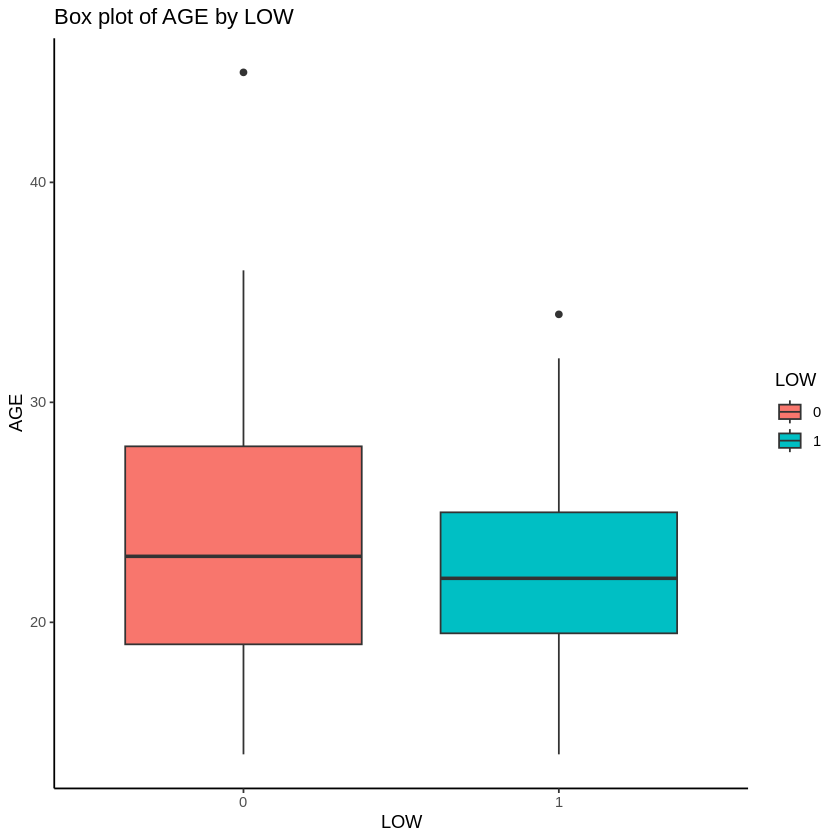

In [ ]:
# Use box plots for numerical variables

ggplot(data, aes(x=LOW, y=AGE,fill=LOW)) +
  ggtitle("Box plot of AGE by LOW")+
  geom_boxplot()+theme_classic()

Observation:

Women who had babies with low birth weight (LOW = 1) tend to be slightly younger on average compared to those who did not (LOW = 0). However, the difference in median age between the two groups is not large.

Variability:

The larger IQR for LOW = 0 indicates more variability in age among women who did not have low birth weight babies. The narrower IQR for LOW = 1 indicates that age is more consistent among women who had low birth weight babies.

Outliers:

The presence of outliers in both groups suggests that while the general trend holds, there are individual cases that deviate significantly from the median values.

Conclusion:

The boxplot shows that there is a slight tendency for women with low birth weight babies to be younger, but the difference is not substantial. Variability in age is greater among women who did not have low birth weight babies.

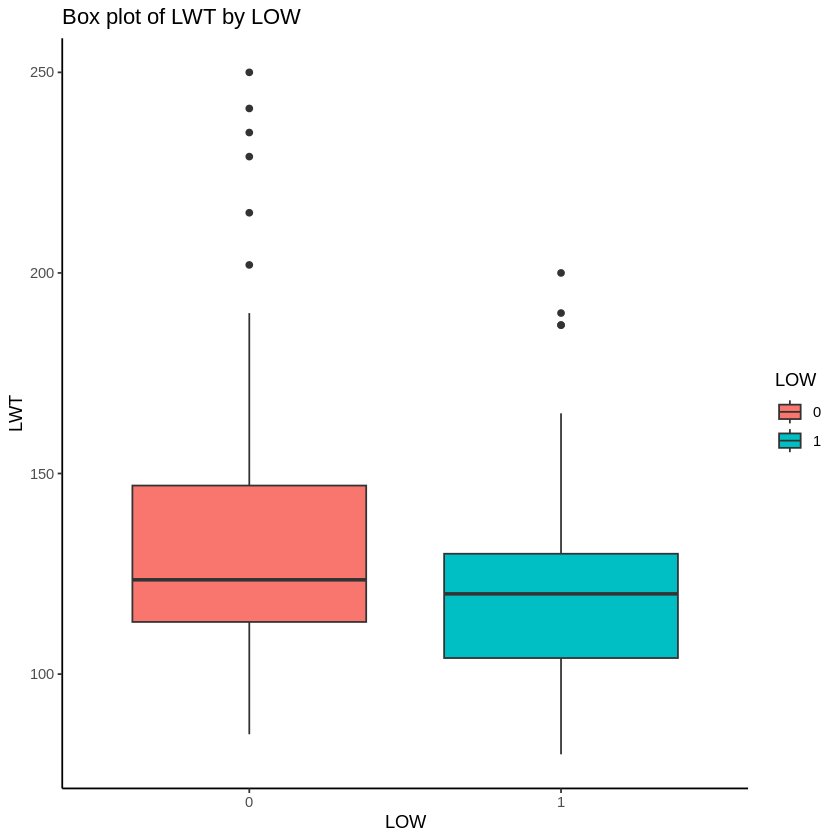

In [ ]:
ggplot(data, aes(x=LOW, y=LWT,fill=LOW)) +
  ggtitle("Box plot of LWT by LOW")+
  geom_boxplot()+theme_classic()

Observation:

Women who had babies with low birth weight (LOW = 1) tend to have a lower median LWT compared to those who did not (LOW = 0). This suggests that a higher weight at the last menstrual period may be associated with a lower likelihood of having a low birth weight baby.

Variability:

The larger IQR for LOW = 0 indicates more variability in LWT among women who did not have low birth weight babies. The narrower IQR for LOW = 1 indicates that LWT is more consistent among women who had low birth weight babies.

Outliers:

The presence of outliers in both groups suggests that while the general trend holds, there are individual cases that deviate significantly from the median values.

# Question 3: Develop a model to predict if birth weight is low or not using the given variables

In [ ]:
#Binary Logistic Regression using glm function
logistic_model<-glm(LOW~.,data=data,family = binomial)
summary(logistic_model)


Call:
glm(formula = LOW ~ ., family = binomial, data = data)

Coefficients:
              Estimate Std. Error z value Pr(>|z|)   
(Intercept)  8.488e-01  1.301e+00   0.652  0.51418   
AGE         -3.917e-02  3.955e-02  -0.990  0.32200   
LWT         -1.491e-02  7.497e-03  -1.989  0.04675 * 
RACE2        1.135e+00  5.517e-01   2.057  0.03964 * 
RACE3        6.655e-01  4.780e-01   1.392  0.16384   
SMOKE1       6.981e-01  4.403e-01   1.586  0.11285   
PTL1         1.856e+00  5.726e-01   3.242  0.00119 **
PTL2         4.758e-01  1.009e+00   0.472  0.63727   
PTL3        -1.559e+01  1.455e+03  -0.011  0.99146   
HT1          1.789e+00  7.466e-01   2.396  0.01655 * 
UI1          8.683e-01  4.878e-01   1.780  0.07508 . 
FTV1        -5.655e-01  4.960e-01  -1.140  0.25420   
FTV2        -9.839e-02  5.465e-01  -0.180  0.85712   
FTV3         1.098e+00  8.644e-01   1.270  0.20394   
FTV4        -9.141e-01  1.378e+00  -0.663  0.50718   
FTV6        -1.295e+01  1.455e+03  -0.009  0.99290   
---
S


Interpretation:

AGE:

* Estimate: -0.03917
* Not statistically significant (p-value = 0.32200)
* A one year increase in age is associated with a decrease in the odds of low birth weight. However the effect is not significant.

LWT:

* Estimate: -0.01491  
* Statistically significant (p-value = 0.04675 *)
* A one pound increase in LWT is associated with a decrease in the odds of low birth weight.

RACE2:

* Estimate: 1.135
* Statistically significant (p-value = 0.03964 *)
* Being black increases the odds of low birth weight compared to the reference category.

RACE3:

* Estimate: 0.6655
* Not statistically significant (p-value = 0.16384)
* Being not white or not black increases the odds of low birth weight compared to the reference category, but this effect is not significant.

SMOKE1:

* Estimate: 0.6981
* Not statistically significant (p-value = 0.11285)
* Smoking during pregnancy increases the odds of low birth weight, though the effect is not significant.

PTL1:

* Estimate: 1.856
* Statistically significant (p-value = 0.00119 **)
* Having a history of premature labor significantly increases the odds of low birth weight.

PTL2:

* Estimate: 0.4758
* Not statistically significant (p-value = 0.63727)
* Additional history of premature labor does not significantly affect the odds of low birth weight.

PTL3:

* Estimate: -15.59
* Not statistically significant (p-value = 0.99146)
* This appears to be an outlier/erroneous value.

HT1:

* Estimate: 1.789
* Statistically significant (p-value = 0.01655 *)
* A history of hypertension increases the odds of low birth weight.

UI1:

* Estimate: 0.8683
* Marginally Statistically significant (p-value = 0.07508)
* Uterine irritability increases the odds of low birth weight, with marginal significance.

FTV:

* Several categories, with mixed results.
* Not statistically significant, indicating that the number of physician visits does not significantly affect the odds of low birth weight.


Note:

While our model includes several variables that are statistically insignificant, it is crucial to emphasize that in the healthcare domain, caution should be exercised when considering variable removal. In healthcare, even seemingly insignificant variables may hold clinical relevance or contribute to a comprehensive understanding of patient outcomes. Therefore, retaining these variables in the model allows for a more holistic analysis that aligns with the complex and multifaceted nature of healthcare data.

In [ ]:
vif(logistic_model)

,GVIF,Df,GVIF^(1/(2*Df))
AGE,1.144183,1,1.069665
LWT,1.381229,1,1.175257
RACE,1.646691,2,1.132799
SMOKE,1.483509,1,1.217994
PTL,1.301326,3,1.044875
HT,1.221716,1,1.105313
UI,1.057265,1,1.028234
FTV,1.394216,5,1.033792


It is observed that no variable has high vif. Hence the problem of multicollinearity does not exist.

# Question 4 Generate three classification tables with cut-off values 0.4, 0.3 and 0.55

In [ ]:
#Estimate predicted probabilities and add a column in the original data
data$predprob<-round(fitted(logistic_model),2)
head(data)

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predprob
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>
1,0,19,182,2,0,0,0,0,0,0.19
2,0,33,155,3,0,0,0,0,3,0.27
3,0,20,105,1,1,0,0,0,1,0.20
4,0,21,108,1,1,0,0,1,2,0.47
5,0,18,107,1,1,0,0,1,0,0.53
6,0,21,124,3,0,0,0,0,0,0.24


In [ ]:
#classification tables with cut-off values 0.4  0.4
data$estimated_low_0.4<-as.factor(ifelse(data$predprob>0.4,1,0))
head(data)

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predprob,estimated_low_0.4
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>
1,0,19,182,2,0,0,0,0,0,0.19,0
2,0,33,155,3,0,0,0,0,3,0.27,0
3,0,20,105,1,1,0,0,0,1,0.20,0
4,0,21,108,1,1,0,0,1,2,0.47,1
5,0,18,107,1,1,0,0,1,0,0.53,1
6,0,21,124,3,0,0,0,0,0,0.24,0


In [ ]:
#classification tables with cut-off values 0.3
data$estimated_low_0.3<-as.factor(ifelse(data$predprob>0.3,1,0))
head(data)

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predprob,estimated_low_0.4,estimated_low_0.3
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>
1,0,19,182,2,0,0,0,0,0,0.19,0,0
2,0,33,155,3,0,0,0,0,3,0.27,0,0
3,0,20,105,1,1,0,0,0,1,0.20,0,0
4,0,21,108,1,1,0,0,1,2,0.47,1,1
5,0,18,107,1,1,0,0,1,0,0.53,1,1
6,0,21,124,3,0,0,0,0,0,0.24,0,0


In [ ]:
#classification tables with cut-off values 0.55
data$estimated_low_0.55<-as.factor(ifelse(data$predprob>0.55,1,0))
head(data)

,LOW,AGE,LWT,RACE,SMOKE,PTL,HT,UI,FTV,predprob,estimated_low_0.4,estimated_low_0.3,estimated_low_0.55
,<fct>,<int>,<int>,<fct>,<fct>,<fct>,<fct>,<fct>,<fct>,<dbl>,<fct>,<fct>,<fct>
1,0,19,182,2,0,0,0,0,0,0.19,0,0,0
2,0,33,155,3,0,0,0,0,3,0.27,0,0,0
3,0,20,105,1,1,0,0,0,1,0.20,0,0,0
4,0,21,108,1,1,0,0,1,2,0.47,1,1,0
5,0,18,107,1,1,0,0,1,0,0.53,1,1,0
6,0,21,124,3,0,0,0,0,0,0.24,0,0,0


# Question 5 : Calculate sensitivity,specificity and misclassification rate for all three tables above. What is the recommended cut-off value?

In [ ]:
# Calculate the confusion matrix for each cutoff value

#                    Predicted Negative (0)	Predicted Positive (1)
# Actual Negative (0)	        TN	                    FP
# Actual Positive (1)	        FN	                    TP

cm_0.4 <- table(data$estimated_low_0.4, data$LOW)
cm_0.3 <- table(data$estimated_low_0.3, data$LOW)
cm_0.55 <- table(data$estimated_low_0.55, data$LOW)

# Calculate sensitivity, specificity, and misclassification rate for each cutoff value
# Sensitivity = True positives (TP) / total number of positive cases true positives (TP) and false negatives (FN)
# Specificity = True Negative (TN) / total number of negative cases true negatives (FN) and false positives (FP)
# Misclassification = Total incorrect predictions (false positives FP and false negatives FN) / the total predictions
sensitivity_0.4 <- cm_0.4[2, 2] / sum(cm_0.4[, 2])
specificity_0.4 <- cm_0.4[1, 1] / sum(cm_0.4[, 1])
misclassification_rate_0.4 <- (sum(cm_0.4[1, 2]) + sum(cm_0.4[2, 1])) / sum(cm_0.4)

sensitivity_0.3 <- cm_0.3[2, 2] / sum(cm_0.3[, 2])
specificity_0.3 <- cm_0.3[1, 1] / sum(cm_0.3[, 1])
misclassification_rate_0.3 <- (sum(cm_0.3[1, 2]) + sum(cm_0.3[2, 1])) / sum(cm_0.3)

sensitivity_0.55 <- cm_0.55[2, 2] / sum(cm_0.55[, 2])
specificity_0.55 <- cm_0.55[1, 1] / sum(cm_0.55[, 1])
misclassification_rate_0.55 <- (sum(cm_0.55[1, 2]) + sum(cm_0.55[2, 1])) / sum(cm_0.55)

# Print the results
cat("Cutoff 0.4:")
cm_0.4
cat("Sensitivity:", sensitivity_0.4, "\n")
cat("Specificity:", specificity_0.4, "\n")
cat("Misclassification rate:", misclassification_rate_0.4,"\n")

cat("Cutoff 0.3:")
cm_0.3
cat("Sensitivity:", sensitivity_0.3, "\n")
cat("Specificity:", specificity_0.3, "\n")
cat("Misclassification rate:", misclassification_rate_0.3,"\n")

cat("Cutoff 0.55:")
cm_0.55
cat("Sensitivity:", sensitivity_0.55, "\n")
cat("Specificity:", specificity_0.55, "\n")
cat("Misclassification rate:", misclassification_rate_0.55,"\n")

Cutoff 0.4:

   
      0   1
  0 108  26
  1  22  33

Sensitivity: 0.559322 
Specificity: 0.8307692 
Misclassification rate: 0.2539683 
Cutoff 0.3:

   
     0  1
  0 97 20
  1 33 39

Sensitivity: 0.6610169 
Specificity: 0.7461538 
Misclassification rate: 0.2804233 
Cutoff 0.55:

   
      0   1
  0 120  39
  1  10  20

Sensitivity: 0.3389831 
Specificity: 0.9230769 
Misclassification rate: 0.2592593 


The recommended cut-off value among 0.3, 0.4 and 0.55 is 0.3 as it is the one that maximize the sum of Sensitivity and Specificity.

# Question 6 : Obtain ROC curve and report area under curve

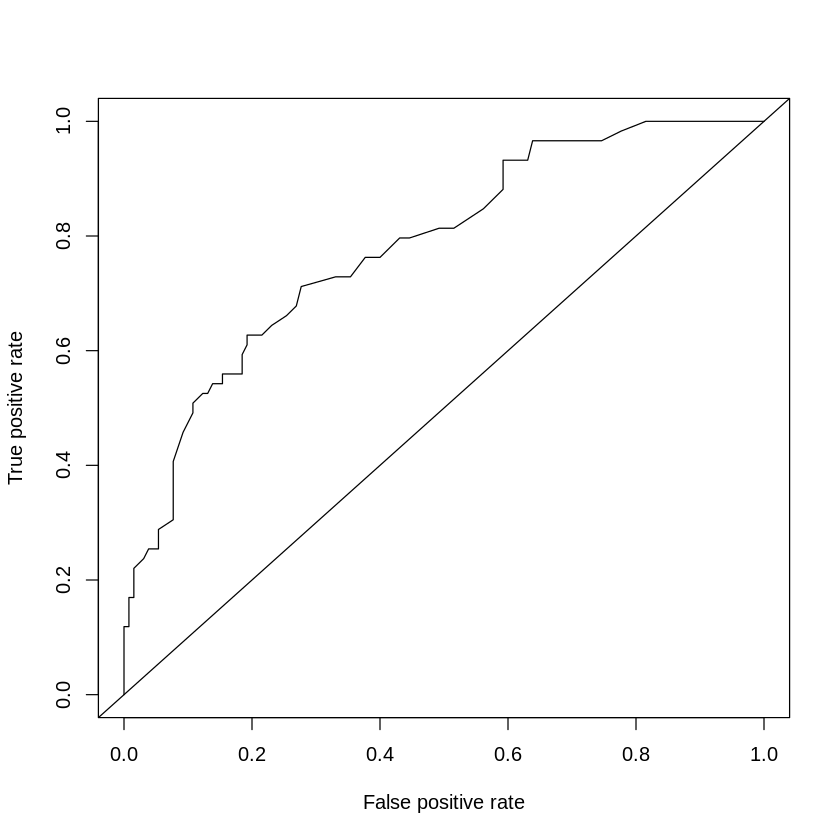

In [ ]:
pred<-prediction(data$predprob,data$LOW)
perf<-performance(pred,"tpr","fpr")
plot(perf)
abline(0,1)

In [ ]:
auc<-performance(pred,"auc")
auc@y.values

[[1]]
[1] 0.78103

The model’s AUC of 78% indicates a relatively strong discriminative ability, implying good predictive performance

In [ ]:
# Best Threshold
ss <- performance(pred, "sens", "spec")
best_threshold <- ss@alpha.values[[1]][which.max(ss@x.values[[1]]+ss@y.values[[1]])]
paste("Best Threshold is :",round(best_threshold,2))

[1] "Best Threshold is : 0.29"

In [ ]:
#Classification Report with best threshold
data$pred_best_th<-as.factor(ifelse(data$predprob>best_threshold,1,0))
confusionMatrix(data$pred_best_th,data$LOW,positive="1")

Confusion Matrix and Statistics

          Reference
Prediction  0  1
         0 95 19
         1 35 40
                                          
               Accuracy : 0.7143          
                 95% CI : (0.6442, 0.7775)
    No Information Rate : 0.6878          
    P-Value [Acc > NIR] : 0.24156         
                                          
                  Kappa : 0.3806          
                                          
 Mcnemar's Test P-Value : 0.04123         
                                          
            Sensitivity : 0.6780          
            Specificity : 0.7308          
         Pos Pred Value : 0.5333          
         Neg Pred Value : 0.8333          
             Prevalence : 0.3122          
         Detection Rate : 0.2116          
   Detection Prevalence : 0.3968          
      Balanced Accuracy : 0.7044          
                                          
       'Positive' Class : 1               
                                    

The sensitivity and specificity values using optimum threshold are approximately 68% and 73% and the accuracy is approximately 71% indicating relatively good model performance.